<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [128]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-01 21:22:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.4’

survey-results-publ 100%[===================>] 201.62M  60.6MB/s    in 3.3s    

2025-03-01 21:22:30 (60.6 MB/s) - ‘survey-results-public.sqlite.4’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [129]:
!pip install pandas

In [130]:
!pip install matplotlib
!pip install numpy

In [131]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [132]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [133]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


   CompTotal
1    28000.0
2    85000.0
3    50000.0
4   110000.0
5   126420.0


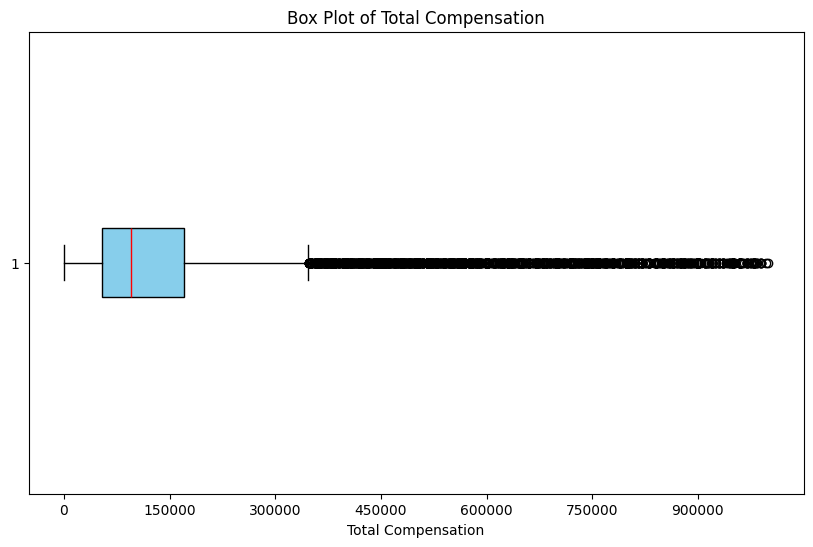

In [140]:
# your code goes here

from matplotlib.ticker import ScalarFormatter, MaxNLocator

# Query to fetch CompTotal data excluding NULL values
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comptotal = pd.read_sql_query(QUERY, conn)

# Remove unrealistic values
df_comptotal = df_comptotal[df_comptotal['CompTotal'] < 1_000_000]

print(df_comptotal.head())

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_comptotal['CompTotal'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'), 
            medianprops=dict(color='red'))
ax = plt.gca()
plt.title("Box Plot of Total Compensation")
plt.xlabel("Total Compensation")

# Disable scientific notation on the x-axis
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


0        18.0
1        39.5
2        49.5
3        21.0
4        21.0
         ... 
65432    21.0
65433    29.5
65434    29.5
65435    21.0
65436    21.0
Name: AgeMapped, Length: 65115, dtype: float64


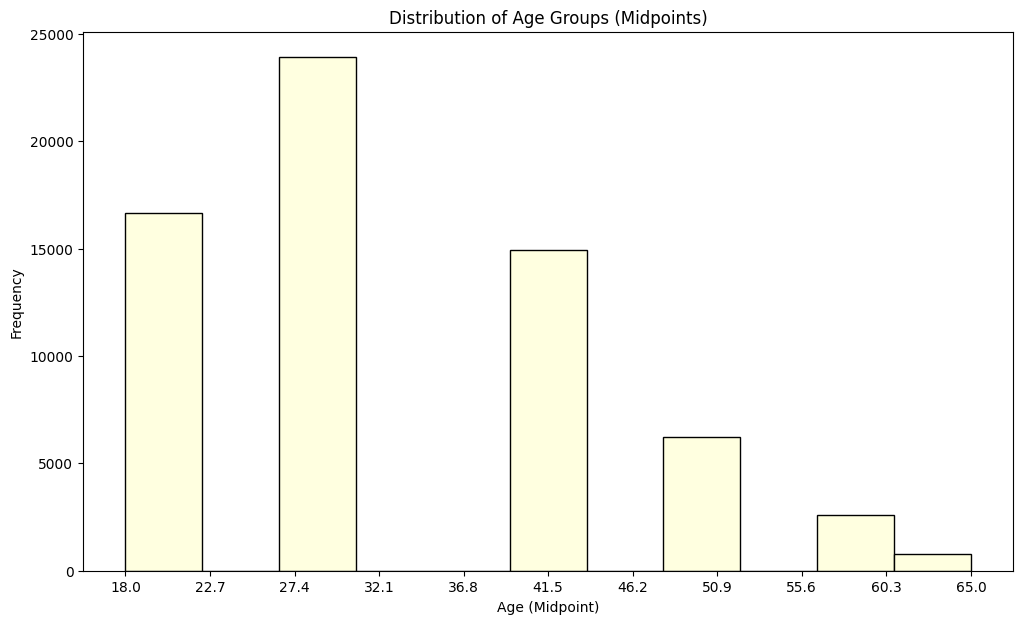

In [145]:
# your code goes here

# Query to fetch Age groups data
QUERY_2 = "SELECT Age FROM main WHERE Age IS NOT NULL"
df_age = pd.read_sql_query(QUERY_2, conn)

# Replace 'Prefer not to say' with NaN and drop NaN values
df_age.replace('Prefer not to say', np.nan, inplace=True)
df_age.dropna(subset=['Age'], inplace=True)

# Mapping age groups to midpoints
mapping_age_group = {
    "25-34 years old": (25 + 34) / 2,
    "35-44 years old": (35 + 44) / 2,
    "18-24 years old": (18 + 24) / 2,
    "45-54 years old": (45 + 54) / 2,
    "55-64 years old": (55 + 64) / 2,
    "Under 18 years old": 18,
    "65 years or older": 65
}

# Map the Age groups to midpoints and add a new column
df_age['AgeMapped'] = df_age['Age'].map(mapping_age_group)

# Check for any remaining NaN values
df_age.dropna(subset=['AgeMapped'], inplace=True)

print(df_age['AgeMapped'])

# Calculate the bin edges based on the range of the data
bin_edges = np.linspace(min(df_age['AgeMapped']), max(df_age['AgeMapped']), num=11)

# Visualize the distribution
plt.figure(figsize=(12, 7))
plt.hist(df_age['AgeMapped'], bins=11, edgecolor='black', color='lightyellow')
plt.title("Distribution of Age Groups (Midpoints)")
plt.xlabel("Age (Midpoint)")
plt.ylabel("Frequency")
plt.xticks(bin_edges)

plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_3348/963987524.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_comptotal_age['Age'].replace('Prefer not to say', np.nan, inplace=True)


<Figure size 1000x600 with 0 Axes>

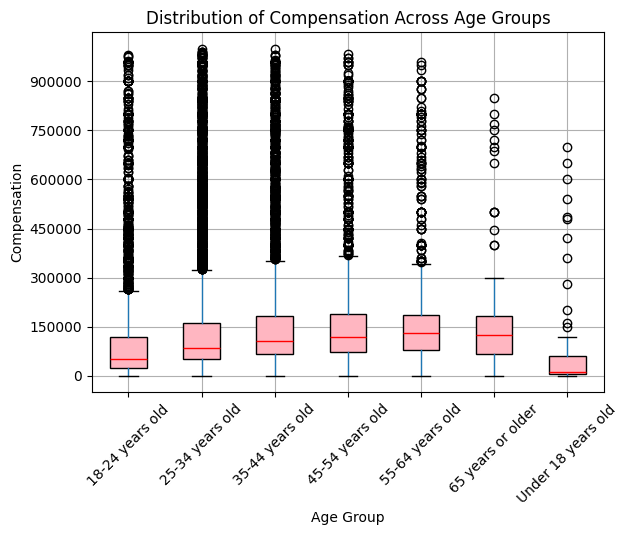

In [146]:
# your code goes here

# Query to fetch Age and Compensation data
QUERY = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df_comptotal_age = pd.read_sql_query(QUERY, conn)

# Replace 'Prefer not to say' with NaN and drop rows with NaN values
df_comptotal_age['Age'].replace('Prefer not to say', np.nan, inplace=True)
df_comptotal_age.dropna(subset=['Age', 'CompTotal'], inplace=True)

# Mapping age groups
age_group_labels = {
    "25-34 years old": "25-34 years old",
    "35-44 years old": "35-44 years old",
    "18-24 years old": "18-24 years old",
    "45-54 years old": "45-54 years old",
    "55-64 years old": "55-64 years old",
    "Under 18 years old": "Under 18 years old",
    "65 years or older": "65 years or older"
}

# Add Age Group labels
df_comptotal_age['AgeGroup'] = df_comptotal_age['Age'].map(age_group_labels)

# Remove unrealistic values
df_comptotal_age = df_comptotal_age[df_comptotal_age['CompTotal'] < 1_000_000]

# Visualize compensation distribution across age groups
plt.figure(figsize=(10, 6))
ax = df_comptotal_age.boxplot(column='CompTotal', by='AgeGroup', vert=True, patch_artist=True, 
                              boxprops=dict(facecolor='lightpink', color='black'), 
                              medianprops=dict(color='red'))

plt.title('Distribution of Compensation Across Age Groups')
plt.suptitle('')  # To remove the default title generated by pandas
plt.xlabel('Age Group')
plt.ylabel('Compensation')

# Disable scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)

plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


   JobSatPoints_6  CompTotal
1             0.0    85000.0
2            20.0   110000.0
3            30.0   126420.0
4            30.0   195000.0
5            25.0    74000.0


<Figure size 1800x1000 with 0 Axes>

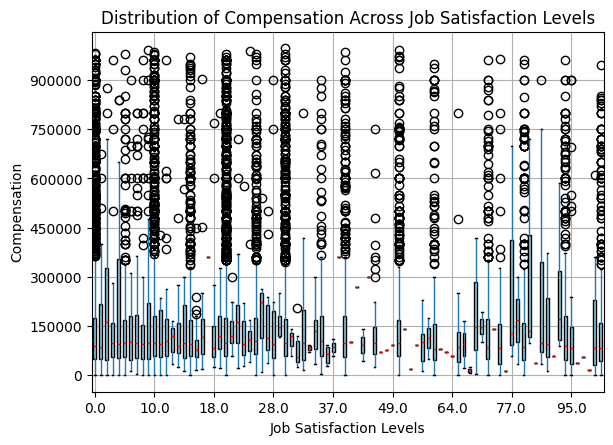

In [148]:
# your code goes here

# Query to fetch Job Satisfaction and Compensation data (not NULL)
QUERY = "SELECT JobSatPoints_6, CompTotal FROM main WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL"
df_comptotal_JST6 = pd.read_sql_query(QUERY, conn)

# Remove unrealistic values
df_comptotal_JST6_clean = df_comptotal_JST6[df_comptotal_JST6['CompTotal'] < 1_000_000]

# Print the first few rows of the cleaned data
print(df_comptotal_JST6_clean.head())

# Visualize compensation distribution grouped by Job Satisfaction
plt.figure(figsize=(18, 10))
ax = df_comptotal_JST6_clean.boxplot(column='CompTotal', by='JobSatPoints_6', vert=True, patch_artist=True, 
                                     boxprops=dict(facecolor='skyblue', color='black'), 
                                     medianprops=dict(color='red'))

plt.title('Distribution of Compensation Across Job Satisfaction Levels')
plt.suptitle('')
plt.ylabel('Compensation')
plt.xlabel('Job Satisfaction Levels')

# Set x-axis to show every 10th tick
ticks = ax.get_xticks()
if len(ticks) > 10:
    ax.set_xticks(ticks[::10])

# Disable scientific notation 
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1800x800 with 0 Axes>

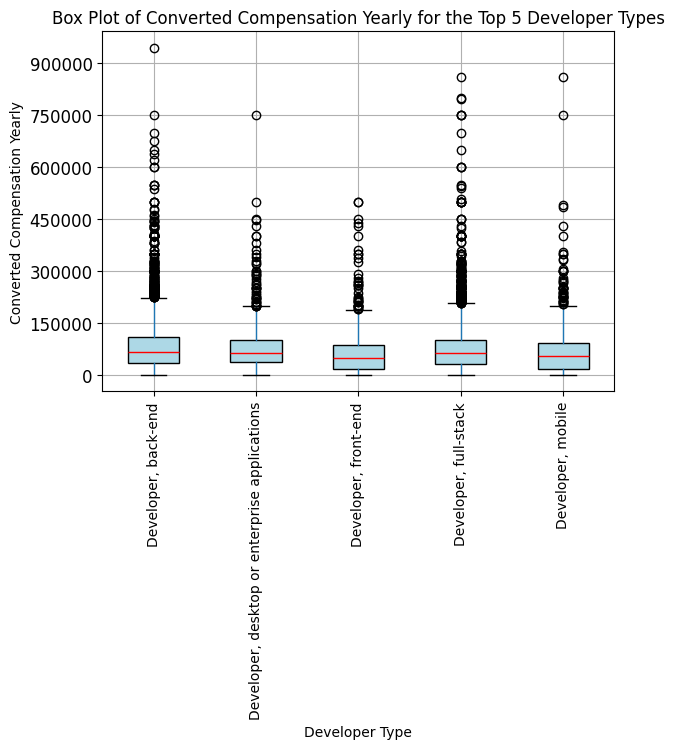

In [150]:
# your code goes here

# Query to fetch ConvertedCompYearly and DevType data (not NULL)
QUERY = "SELECT ConvertedCompYearly, DevType FROM main WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL"
df_devtype = pd.read_sql_query(QUERY, conn)

# Convert 'ConvertedCompYearly' to numeric, errors to NaN
df_devtype['ConvertedCompYearly'] = pd.to_numeric(df_devtype['ConvertedCompYearly'], errors='coerce')

# Remove unrealistic values 
df_devtype = df_devtype[df_devtype['ConvertedCompYearly'] < 1_000_000]

# Top 5 DevType 
top_devtypes = df_devtype['DevType'].value_counts().nlargest(5).index

# Filter data to include only the top 5 DevType values
df_top_5_dev = df_devtype[df_devtype['DevType'].isin(top_devtypes)]

# Box plot for ConvertedCompYearly grouped by DevType
plt.figure(figsize=(18, 8))
ax = df_top_5_dev.boxplot(column='ConvertedCompYearly', by='DevType', vert=True, patch_artist=True, 
                           boxprops=dict(facecolor='lightblue', color='black'), 
                           medianprops=dict(color='red'))

plt.title('Box Plot of Converted Compensation Yearly for the Top 5 Developer Types')
plt.suptitle('') 
plt.ylabel('Converted Compensation Yearly')
plt.xlabel('Developer Type')
plt.xticks(rotation=90)

# Disable scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis='y', labelsize=12)

plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1800x800 with 0 Axes>

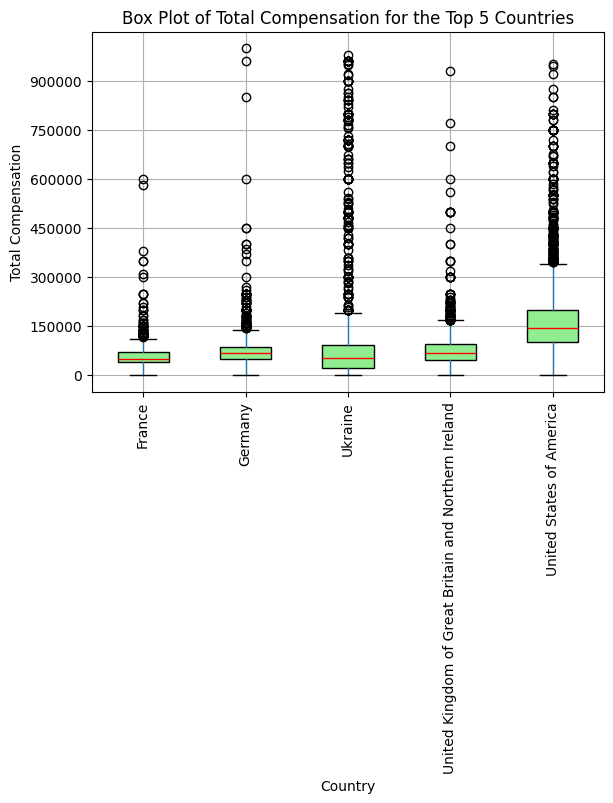

In [151]:
# your code goes here


# Query to fetch CompTotal and Country data (not NULL)
QUERY = "SELECT CompTotal, Country FROM main WHERE CompTotal IS NOT NULL AND Country IS NOT NULL"
df_country_comp = pd.read_sql_query(QUERY, conn)

# Remove unrealistic values 
df_country_comp = df_country_comp[df_country_comp['CompTotal'] < 1_000_000]

# Top 5 countries
top_countries = df_country_comp['Country'].value_counts().nlargest(5).index

# Filter data to include only the top 5 countries
df_top_5_countries = df_country_comp[df_country_comp['Country'].isin(top_countries)]

# Box plot for CompTotal grouped by Country
plt.figure(figsize=(18, 8))
ax = df_top_5_countries.boxplot(column='CompTotal', by='Country', vert=True, patch_artist=True, 
                                 boxprops=dict(facecolor='lightgreen', color='black'), 
                                 medianprops=dict(color='red'))

plt.title('Box Plot of Total Compensation for the Top 5 Countries')
plt.suptitle('')  # To remove the default title generated by pandas
plt.ylabel('Total Compensation')
plt.xlabel('Country')
plt.xticks(rotation=90)

# Disable scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False) 
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_3348/2651383619.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_employment_comp['CompTotal'].fillna(median_comp, inplace=True)


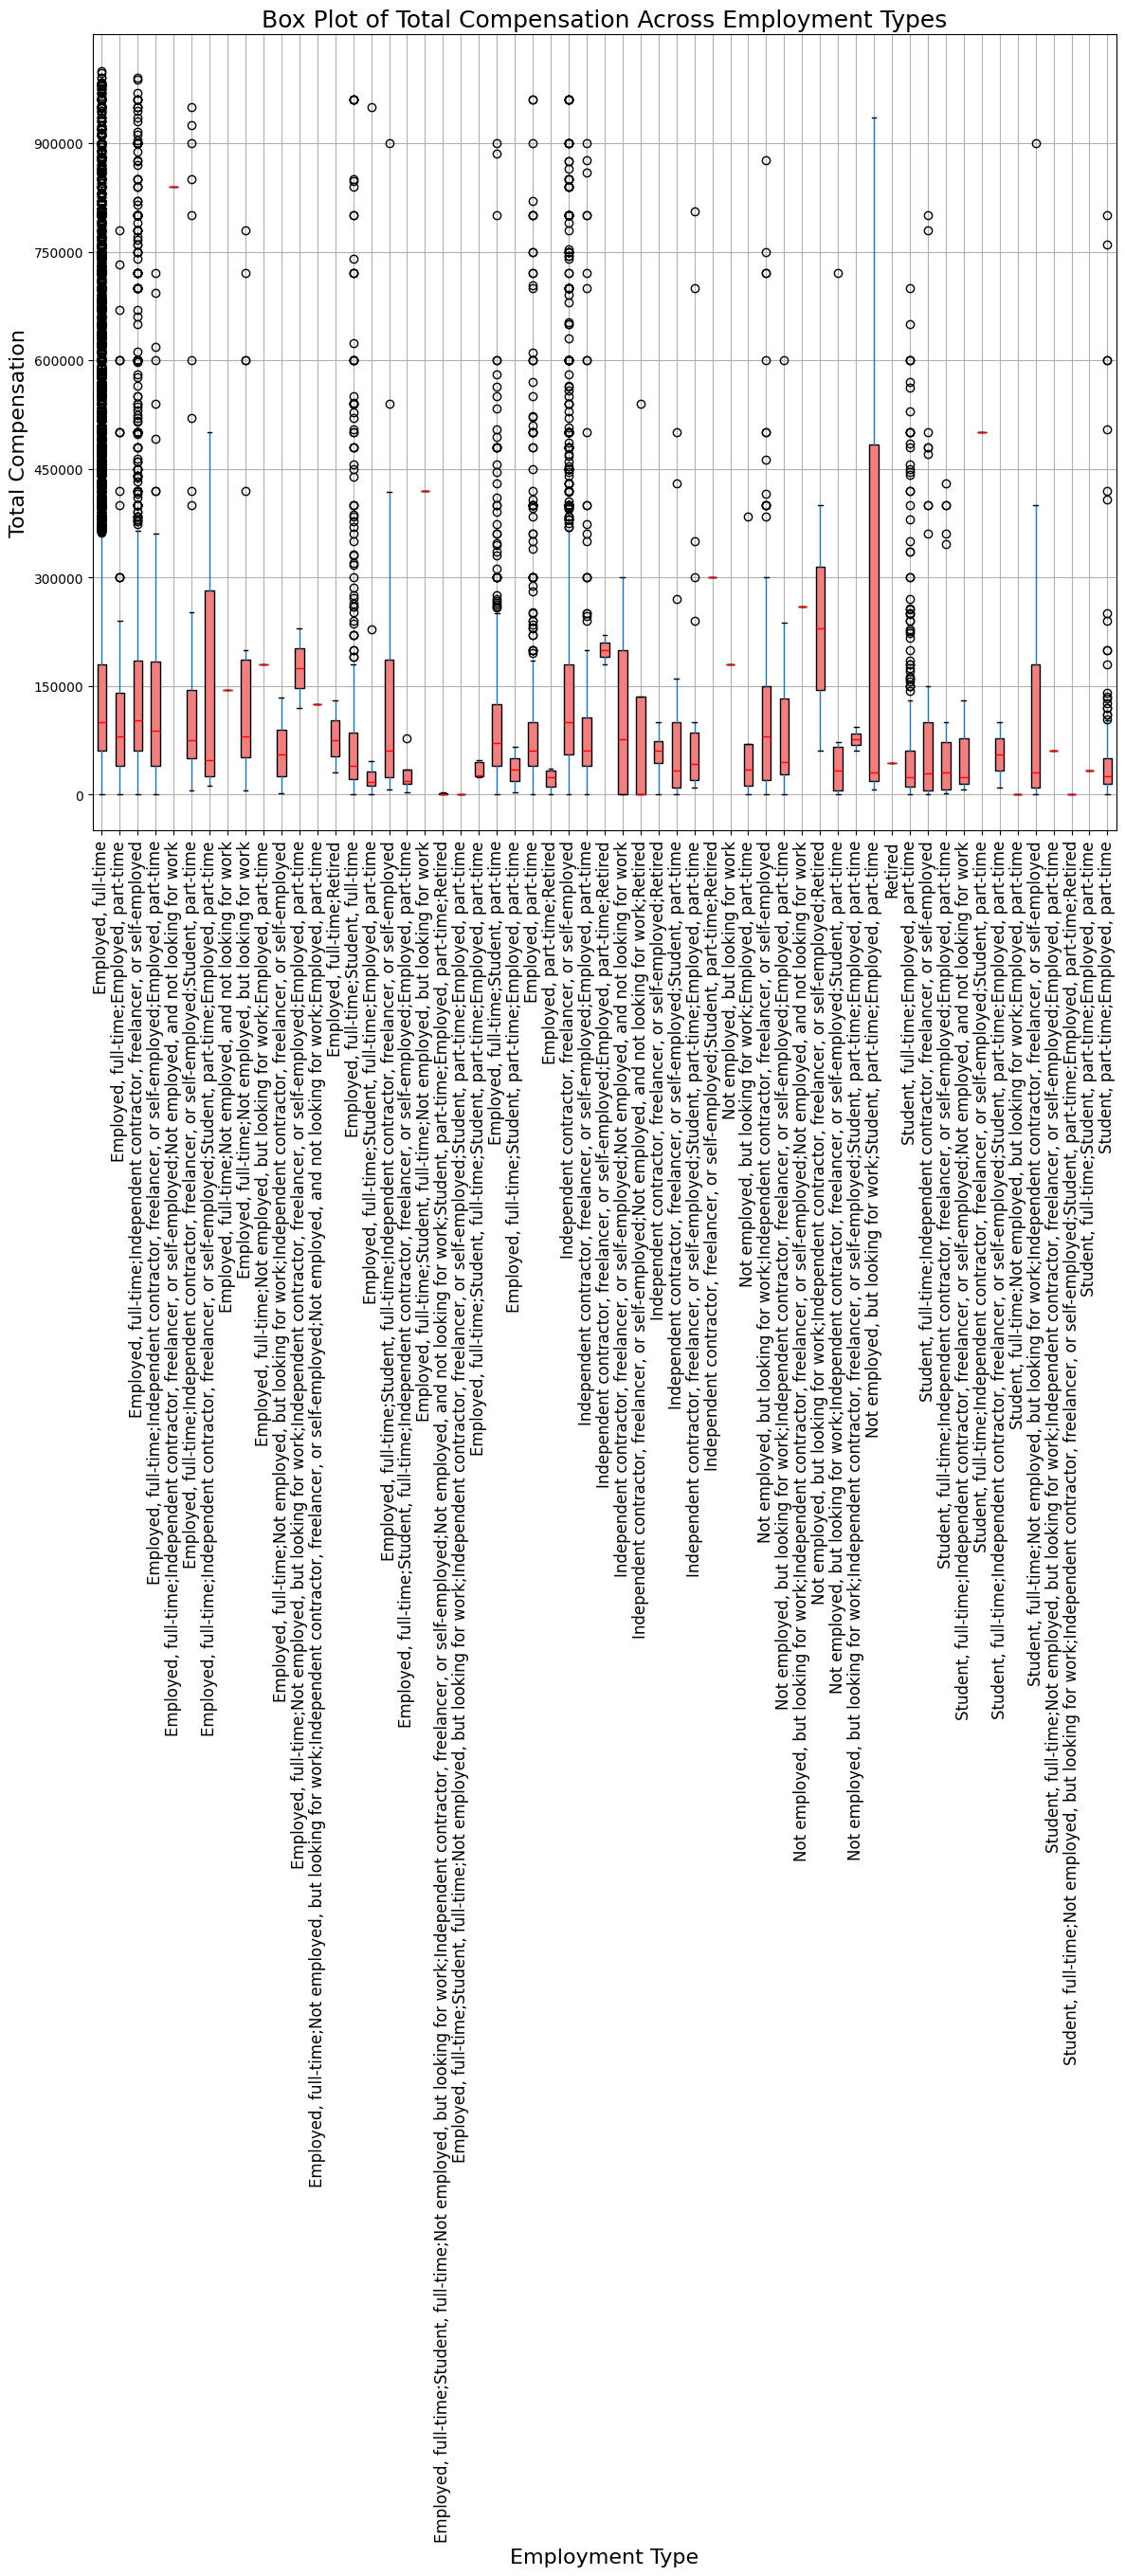

In [186]:
# your code goes here

# Query to fetch CompTotal and Employment data (not NULL)
QUERY = "SELECT CompTotal, Employment FROM main WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL"
df_employment_comp = pd.read_sql_query(QUERY, conn)

# Remove rows with NaN values in EmploymentType
df_employment_comp.dropna(subset=['Employment'], inplace=True)

# Remove unrealistic values 
df_employment_comp = df_employment_comp[df_employment_comp['CompTotal'] < 1_000_000]

# Replace NaN values in CompTotal with the median of CompTotal
median_comp = df_employment_comp['CompTotal'].median()
df_employment_comp['CompTotal'].fillna(median_comp, inplace=True)

# Create the box plot for CompTotal grouped by Employment
fig, ax = plt.subplots(figsize=(18, 14))
df_employment_comp.boxplot(column='CompTotal', by='Employment', vert=True, patch_artist=True, 
                           boxprops=dict(facecolor='lightcoral', color='black'), 
                           medianprops=dict(color='red'), ax=ax)

plt.title('Box Plot of Total Compensation Across Employment Types', fontsize=18)
plt.suptitle('', fontsize=16) 
plt.ylabel('Total Compensation', fontsize=16)
plt.xlabel('Employment Type', fontsize=16)

plt.xticks(rotation=90, fontsize=12)

# Disable scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Manually adjust margins
plt.subplots_adjust(left=0.1, right=0.7, top=0.7, bottom=0.1)

# Show the plot
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


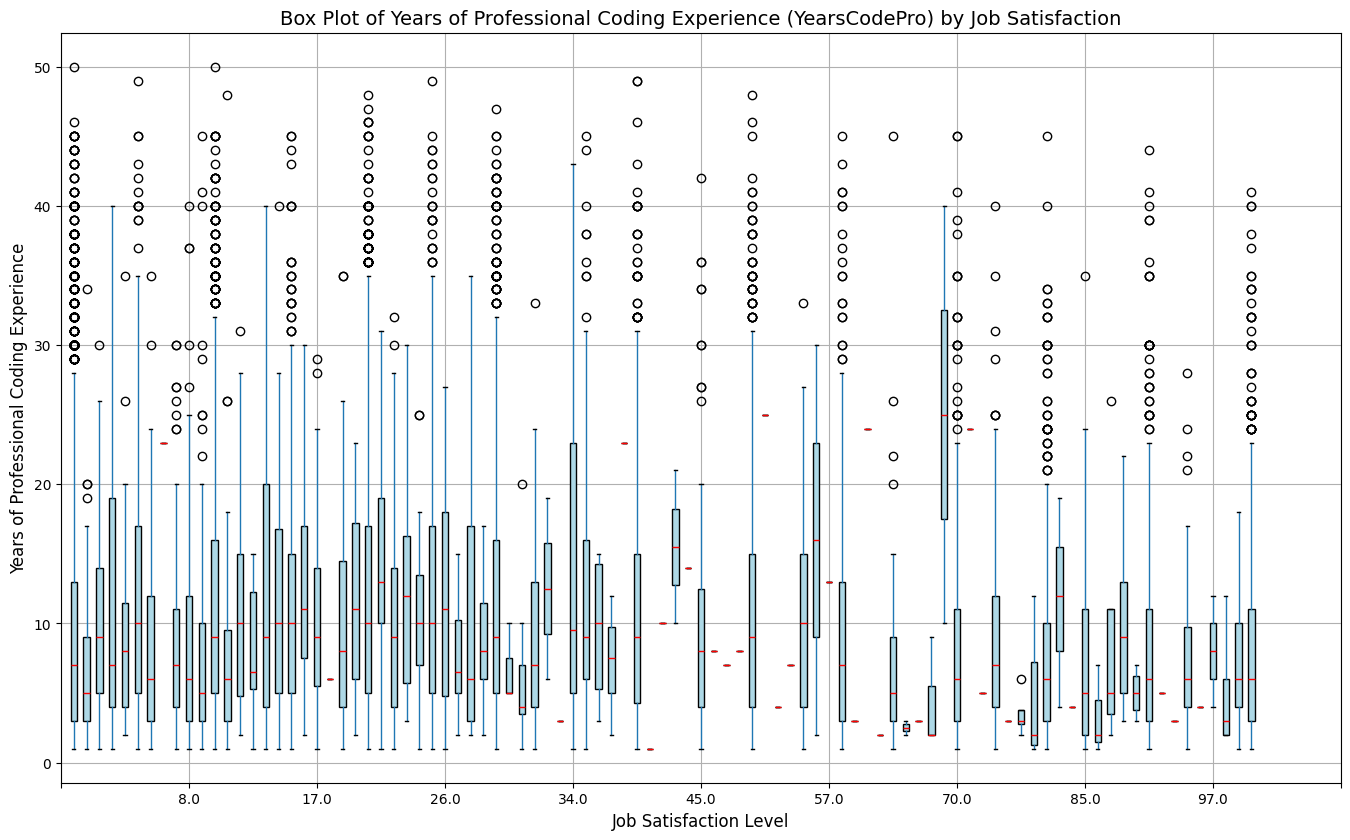

In [187]:
# your code goes here

from matplotlib.ticker import MaxNLocator

# Query to fetch YearsCodePro and JobSatPoints_6 data (not NULL)
QUERY = "SELECT YearsCodePro, JobSatPoints_6 FROM main WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
df_jobsat = pd.read_sql_query(QUERY, conn)

# Ensure YearsCodePro and JobSatPoints_6 are numeric
df_jobsat['YearsCodePro'] = pd.to_numeric(df_jobsat['YearsCodePro'], errors='coerce')
df_jobsat['JobSatPoints_6'] = pd.to_numeric(df_jobsat['JobSatPoints_6'], errors='coerce')

# Remove rows where YearsCodePro or JobSatPoints_6 are NaN
df_jobsat.dropna(subset=['YearsCodePro', 'JobSatPoints_6'], inplace=True)

# Box plot for YearsCodePro grouped by JobSatPoints_6
fig, ax = plt.subplots(figsize=(16, 10)) 
ax = df_jobsat.boxplot(column='YearsCodePro', by='JobSatPoints_6', vert=True, patch_artist=True, 
                       boxprops=dict(facecolor='lightblue', color='black'), 
                       medianprops=dict(color='red'), ax=ax)

plt.title('Box Plot of Years of Professional Coding Experience (YearsCodePro) by Job Satisfaction', fontsize=14)
plt.suptitle('', fontsize=12)
plt.xlabel('Job Satisfaction Level', fontsize=12)
plt.ylabel('Years of Professional Coding Experience', fontsize=12)

x_ticks = df_jobsat['JobSatPoints_6'].unique() 
x_ticks = sorted(x_ticks) 
ax.set_xticks(x_ticks)

# Set x-axis ticks in steps of 10 from 1 to 100
ax.set_xticks(range(0, 101, 10))

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)

plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [188]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
